In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir(r'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata\2018')

os.chdir(r'E:\BaiduSyncdisk\Futureheatwave\data\downscaling')
# 

In [2]:
import pandas as pd


# 读取 CSV 文件
df_ERA5_Land = pd.read_csv(r'E:\BaiduSyncdisk\Futureheatwave\data\downscaling\Station_Temperature_Data_2001_2014_ERA5_Land.csv')

print(df_ERA5_Land)

           stationid   timestamp       temp
0       5.815010e+10  2001-05-01  14.044602
1       5.815010e+10  2001-05-02  16.483611
2       5.815010e+10  2001-05-03  17.713989
3       5.815010e+10  2001-05-04  17.802615
4       5.815010e+10  2001-05-05  16.046278
...              ...         ...        ...
852511  5.527910e+10  2014-09-26   2.395189
852512  5.527910e+10  2014-09-27  -1.725735
852513  5.527910e+10  2014-09-28  -0.004715
852514  5.527910e+10  2014-09-29  -0.535818
852515  5.527910e+10  2014-09-30  -3.812015

[852516 rows x 3 columns]


In [3]:
# 读取 CSV 文件
df_CMIP6 = pd.read_csv(r'E:\BaiduSyncdisk\Futureheatwave\data\downscaling\Station_Temperature_Data_2001_2014_CMIP6.csv')

print(df_CMIP6)

           stationid   timestamp       temp
0       5.815010e+10  2001-05-01  16.767511
1       5.815010e+10  2001-05-02  16.878290
2       5.815010e+10  2001-05-03  16.569604
3       5.815010e+10  2001-05-04  17.078851
4       5.815010e+10  2001-05-05  17.528406
...              ...         ...        ...
852511  5.527910e+10  2014-09-26   5.279047
852512  5.527910e+10  2014-09-27   5.196802
852513  5.527910e+10  2014-09-28   4.848566
852514  5.527910e+10  2014-09-29   4.703149
852515  5.527910e+10  2014-09-30   4.676111

[852516 rows x 3 columns]


In [4]:
# 读取 CSV 文件
station_data = pd.read_csv(r'E:\BaiduSyncdisk\Futureheatwave\data\downscaling\combined_data.csv')

print(station_data)

             STATION        DATE   LATITUDE   LONGITUDE  ELEVATION  \
0        46686099999  2001-01-01  25.077731  121.232822      32.61   
1        46686099999  2001-01-02  25.077731  121.232822      32.61   
2        46686099999  2001-01-03  25.077731  121.232822      32.61   
3        46686099999  2001-01-04  25.077731  121.232822      32.61   
4        46686099999  2001-01-05  25.077731  121.232822      32.61   
...              ...         ...        ...         ...        ...   
2029560  59997099999  2014-12-27  10.383333  114.366667       5.00   
2029561  59997099999  2014-12-28  10.383333  114.366667       5.00   
2029562  59997099999  2014-12-29  10.383333  114.366667       5.00   
2029563  59997099999  2014-12-30  10.383333  114.366667       5.00   
2029564  59997099999  2014-12-31  10.383333  114.366667       5.00   

                                      NAME  TEMP   MAX   MIN  
0        CHIANG KAI SHEK INTERNATIONAL, TW  60.6  67.1  53.6  
1        CHIANG KAI SHEK INTERNAT

In [5]:
# Assuming df_CMIP6, df_ERA5_Land, and combined_data are already loaded

# Convert timestamps to datetime format to ensure they are in the same format for merging
df_CMIP6['timestamp'] = pd.to_datetime(df_CMIP6['timestamp'])
df_ERA5_Land['timestamp'] = pd.to_datetime(df_ERA5_Land['timestamp'])
station_data['DATE'] = pd.to_datetime(station_data['DATE'])

# Merge ERA5 and combined_data based on station ID and timestamp
merged_data_1 = pd.merge(df_ERA5_Land, station_data, left_on=['stationid', 'timestamp'], right_on=['STATION', 'DATE'], how='inner')

# Merge the result with CMIP6 data on station ID and timestamp
merged_data_final = pd.merge(merged_data_1, df_CMIP6, left_on=['stationid', 'timestamp'], right_on=['stationid', 'timestamp'], how='inner')

# Print merged data
print(merged_data_final.head())


      stationid  timestamp     temp_x      STATION       DATE  LATITUDE  \
0  5.815010e+10 2001-05-01  14.044602  58150099999 2001-05-01     33.75   
1  5.815010e+10 2001-05-02  16.483611  58150099999 2001-05-02     33.75   
2  5.815010e+10 2001-05-03  17.713989  58150099999 2001-05-03     33.75   
3  5.815010e+10 2001-05-04  17.802615  58150099999 2001-05-04     33.75   
4  5.815010e+10 2001-05-05  16.046278  58150099999 2001-05-05     33.75   

   LONGITUDE  ELEVATION         NAME  TEMP   MAX   MIN     temp_y  
0      120.3        3.0  SHEYANG, CH  55.3  59.2  51.6  16.767511  
1      120.3        3.0  SHEYANG, CH  60.5  72.5  51.1  16.878290  
2      120.3        3.0  SHEYANG, CH  64.6  76.1  55.4  16.569604  
3      120.3        3.0  SHEYANG, CH  64.6  71.4  58.6  17.078851  
4      120.3        3.0  SHEYANG, CH  61.8  68.4  57.7  17.528406  


In [6]:
# 读取 CSV 文件
station_region = pd.read_csv(r'E:\BaiduSyncdisk\Futureheatwave\data\downscaling\Stations-region.csv')

print(station_region.head())

   OID_  Join_Count  TARGET_FID      STATION   LATITUDE   LONGITUDE  \
0     1           1           0  50136099999  52.966667  122.533333   
1     2           1           1  50353099999  51.733333  126.633333   
2     3           1           2  50434099999  50.450000  121.700000   
3     4           1           3  50468099999  50.250000  127.450000   
4     5           1           4  50527099999  49.250000  119.700000   

   ELEVATION        NAME   CNAME        ASCRIPTION      GB      lng      lat  \
0      438.0    MOHE, CH    黑龙江省      Heilongjiang  230000  128.074  46.9622   
1      175.6    HUMA, CH    黑龙江省      Heilongjiang  230000  128.074  46.9622   
2      733.0  TULIHE, CH  内蒙古自治区  Neimonggol\r\r\n  150000  111.603  41.5719   
3      166.0   AIHUI, CH    黑龙江省      Heilongjiang  230000  128.074  46.9622   
4      650.0  HAILAR, CH  内蒙古自治区  Neimonggol\r\r\n  150000  111.603  41.5719   

            region  merge    Shape_Leng  
0  Northeast China      1  5.109263e+06  
1  North

In [7]:
import numpy as np

# Calculate statistics for the first subplot (ERA5-Land vs Observation)
r_1 = x_era5_land.corr(y_observation)
nsd_1 = np.std(y_observation) / np.std(x_era5_land)
mae_1 = np.mean(np.abs(y_observation - x_era5_land))
rmse_1 = np.sqrt(((y_observation - x_era5_land) ** 2).mean())

# Calculate statistics for the second subplot (CMIP6 vs Observation)
r_2 = x_cmip6.corr(y_observation)
nsd_2 = np.std(y_observation) / np.std(x_cmip6)
mae_2 = np.mean(np.abs(y_observation - x_cmip6))
rmse_2 = np.sqrt(((y_observation - x_cmip6) ** 2).mean())

# Plotting with updated statistics (removing bias, adding NSD and MAE)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot (ERA5-Land vs Observation)
hb1 = axes[0].hexbin(x_era5_land, y_observation, gridsize=200, cmap='viridis', mincnt=1)
axes[0].plot([x_era5_land.min(), x_era5_land.max()], [x_era5_land.min(), x_era5_land.max()], color='black', linestyle='-', linewidth=1, label='1:1 Line')
axes[0].plot(np.unique(x_era5_land), np.poly1d(np.polyfit(x_era5_land, y_observation, 1))(np.unique(x_era5_land)), color='red', linestyle='-', linewidth=1, label='Regression Line')
axes[0].set_xlabel('ERA5-Land temperature (°C)', fontsize=16)
axes[0].set_ylabel('Observation temperature (°C)', fontsize=16)
axes[0].text(0.05, 0.95, f'R = {r_1:.2f} (p < 0.01)\nNSD = {nsd_1:.2f}\nMAE = {mae_1:.2f} °C\nRMSE = {rmse_1:.2f} °C', 
             color='red', fontsize=16, verticalalignment='top', transform=axes[0].transAxes)

# Second subplot (CMIP6 vs Observation)
hb2 = axes[1].hexbin(x_cmip6, y_observation, gridsize=200, cmap='viridis', mincnt=1)
axes[1].plot([x_cmip6.min(), x_cmip6.max()], [x_cmip6.min(), x_cmip6.max()], color='black', linestyle='-', linewidth=1)
axes[1].plot(np.unique(x_cmip6), np.poly1d(np.polyfit(x_cmip6, y_observation, 1))(np.unique(x_cmip6)), color='red', linestyle='-', linewidth=1)
axes[1].set_xlabel('CMIP6 temperature (°C)', fontsize=16)
axes[1].text(0.05, 0.95, f'R = {r_2:.2f} (p < 0.01)\nNSD = {nsd_2:.2f}\nMAE = {mae_2:.2f} °C\nRMSE = {rmse_2:.2f} °C', 
             color='red', fontsize=16, verticalalignment='top', transform=axes[1].transAxes)

# Shared colorbar
cbar = fig.colorbar(hb1, ax=axes.ravel().tolist(), orientation='vertical', label='Count', pad=0.02)

# Shared legend
fig.legend(loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.5, 0.05), handlelength=1, handletextpad=0.1, borderaxespad=0.3)

# Save and show plot
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


NameError: name 'x_era5_land' is not defined

C:\Users\HP\AppData\Local\Temp\ipykernel_25820\1313560989.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to provide more space for colorbar


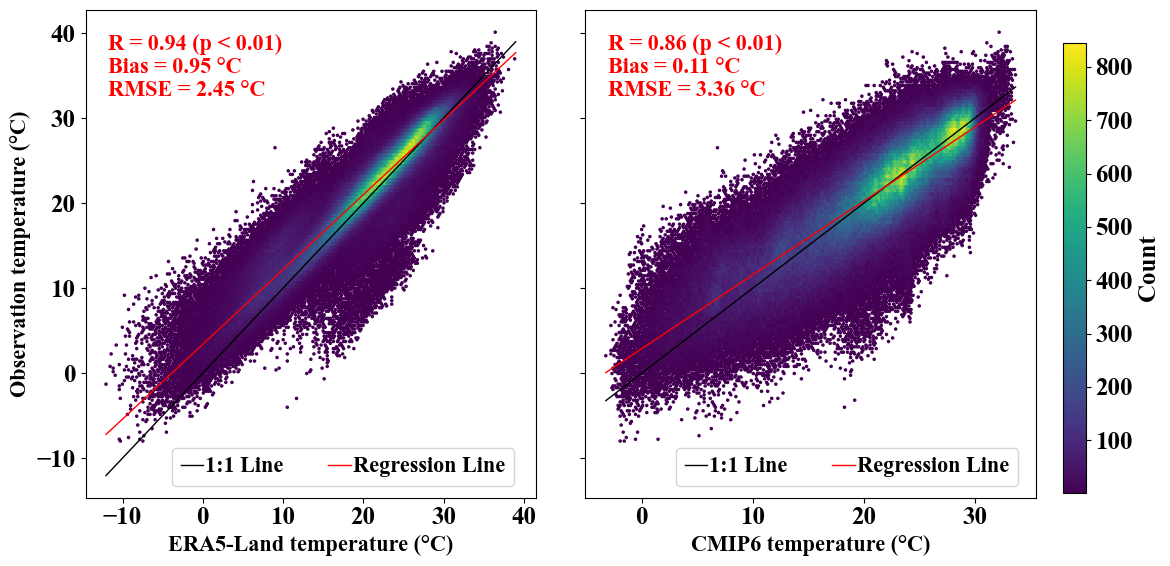

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (assuming the CSV file is loaded as per the earlier merged example)
# merged_data should already be available from the previous merge process
# Merged data contains columns like 'temp_x' (ERA5 temperature) and 'TEMP' (Observation temperature)

# Scatter plot using the merged data
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)


# Now use y_observation (in Celsius) for further plotting and analysis as in the previous example
merged_data_clean = merged_data_final.dropna()
# Data for the first subplot (left) - ERA5-Land vs Observation temperature
x_era5_land = merged_data_clean['temp_x']  # ERA5 temperature from merged_data
y_observation = merged_data_clean['TEMP']  # Observation temperature from merged_data



# Convert Fahrenheit to Celsius for y_observation
y_observation_celsius = (merged_data_clean['TEMP'] - 32) * 5.0 / 9.0

# Update y_observation to be in Celsius
y_observation = y_observation_celsius

# Scatter plot properties for the first subplot (left)
hb1 = axes[0].hexbin(x_era5_land, y_observation, gridsize=200, cmap='viridis', mincnt=1)
axes[0].plot([x_era5_land.min(), x_era5_land.max()], [x_era5_land.min(), x_era5_land.max()], color='black', linestyle='-', linewidth=1, label='1:1 Line')  # 1:1 line
axes[0].plot(np.unique(x_era5_land), np.poly1d(np.polyfit(x_era5_land, y_observation, 1))(np.unique(x_era5_land)), color='red', linestyle='-', linewidth=1, label='Regression Line')  # Regression line

# Calculate statistics for the first dataset
bias_1 = y_observation.mean() - x_era5_land.mean()
rmse_1 = np.sqrt(((y_observation - x_era5_land) ** 2).mean())
r_1 = x_era5_land.corr(y_observation)

# Add labels, title, and text for statistics in the first subplot with two decimal places
axes[0].set_xlabel('ERA5-Land temperature (°C)', fontsize=16)
axes[0].set_ylabel('Observation temperature (°C)', fontsize=16)
axes[0].text(0.05, 0.95, f'R = {r_1:.2f} (p < 0.01)\nBias = {bias_1:.2f} °C\nRMSE = {rmse_1:.2f} °C', 
             color='red', fontsize=16, verticalalignment='top', transform=axes[0].transAxes)

# Data for the second subplot (right) - CMIP6 vs Observation temperature (assuming another dataset exists)
# For demonstration, I'm assuming 'temp_y' represents CMIP6 temperatures
# We would replace this with real CMIP6 data or use the same merged dataset in practice
x_cmip6 = merged_data_clean['temp_y']  # Using temp_x again for demonstration

# Scatter plot properties for the second subplot (right)
hb2 = axes[1].hexbin(x_cmip6, y_observation, gridsize=200, cmap='viridis', mincnt=1)
axes[1].plot([x_cmip6.min(), x_cmip6.max()], [x_cmip6.min(), x_cmip6.max()], color='black', linestyle='-', linewidth=1)  # 1:1 line
axes[1].plot(np.unique(x_cmip6), np.poly1d(np.polyfit(x_cmip6, y_observation, 1))(np.unique(x_cmip6)), color='red', linestyle='-', linewidth=1)  # Regression line

# Calculate statistics for the second dataset
bias_2 = y_observation.mean() - x_cmip6.mean()
rmse_2 = np.sqrt(((y_observation - x_cmip6) ** 2).mean())
r_2 = x_cmip6.corr(y_observation)

# Add labels, title, and text for statistics in the second subplot with two decimal places
axes[1].set_xlabel('CMIP6 temperature (°C)', fontsize=16)
axes[1].text(0.05, 0.95, f'R = {r_2:.2f} (p < 0.01)\nBias = {bias_2:.2f} °C\nRMSE = {rmse_2:.2f} °C', 
             color='red', fontsize=16, verticalalignment='top', transform=axes[1].transAxes)

# Adding shared colorbar at the right side, adjusting its position downwards
cbar = fig.colorbar(hb1, ax=axes.ravel().tolist(), orientation='vertical', label='Count', pad=0.02)
cbar.ax.set_position([0.90, 0.15, 0.02, 0.75])  # Manually adjust [left, bottom, width, height] for colorbar

# Adding shared legend at the bottom
fig.legend(loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.30, 0.15),handlelength=1,handletextpad=0.1,borderaxespad=0.3)
# Adding shared legend at the bottom
fig.legend(loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.72, 0.15),handlelength=1,handletextpad=0.1,borderaxespad=0.3)
# Saving and showing plot with adjusted layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to provide more space for colorbar
plt.savefig('station-scatterplot-right-colorbar.png', dpi=400, facecolor="none", transparent=True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25820\1071403464.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to provide more space for colorbar


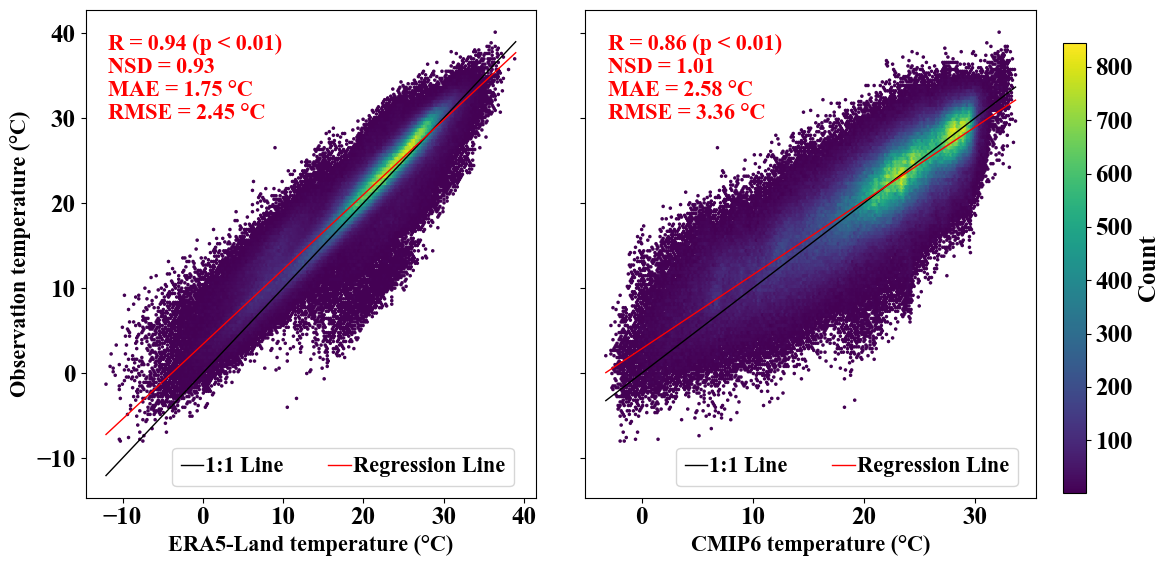

In [12]:
import numpy as np

# Calculate statistics for the first subplot (ERA5-Land vs Observation)
r_1 = x_era5_land.corr(y_observation)
nsd_1 = np.std(y_observation) / np.std(x_era5_land)
mae_1 = np.mean(np.abs(y_observation - x_era5_land))
rmse_1 = np.sqrt(((y_observation - x_era5_land) ** 2).mean())

# Calculate statistics for the second subplot (CMIP6 vs Observation)
r_2 = x_cmip6.corr(y_observation)
nsd_2 = np.std(y_observation) / np.std(x_cmip6)
mae_2 = np.mean(np.abs(y_observation - x_cmip6))
rmse_2 = np.sqrt(((y_observation - x_cmip6) ** 2).mean())

# Plotting with updated statistics (removing bias, adding NSD and MAE)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First subplot (ERA5-Land vs Observation)
hb1 = axes[0].hexbin(x_era5_land, y_observation, gridsize=200, cmap='viridis', mincnt=1)
axes[0].plot([x_era5_land.min(), x_era5_land.max()], [x_era5_land.min(), x_era5_land.max()], color='black', linestyle='-', linewidth=1, label='1:1 Line')
axes[0].plot(np.unique(x_era5_land), np.poly1d(np.polyfit(x_era5_land, y_observation, 1))(np.unique(x_era5_land)), color='red', linestyle='-', linewidth=1, label='Regression Line')
axes[0].set_xlabel('ERA5-Land temperature (°C)', fontsize=16)
axes[0].set_ylabel('Observation temperature (°C)', fontsize=16)
axes[0].text(0.05, 0.95, f'R = {r_1:.2f} (p < 0.01)\nNSD = {nsd_1:.2f}\nMAE = {mae_1:.2f} °C\nRMSE = {rmse_1:.2f} °C', 
             color='red', fontsize=16, verticalalignment='top', transform=axes[0].transAxes)

# Second subplot (CMIP6 vs Observation)
hb2 = axes[1].hexbin(x_cmip6, y_observation, gridsize=200, cmap='viridis', mincnt=1)
axes[1].plot([x_cmip6.min(), x_cmip6.max()], [x_cmip6.min(), x_cmip6.max()], color='black', linestyle='-', linewidth=1)
axes[1].plot(np.unique(x_cmip6), np.poly1d(np.polyfit(x_cmip6, y_observation, 1))(np.unique(x_cmip6)), color='red', linestyle='-', linewidth=1)
axes[1].set_xlabel('CMIP6 temperature (°C)', fontsize=16)
axes[1].text(0.05, 0.95, f'R = {r_2:.2f} (p < 0.01)\nNSD = {nsd_2:.2f}\nMAE = {mae_2:.2f} °C\nRMSE = {rmse_2:.2f} °C', 
             color='red', fontsize=16, verticalalignment='top', transform=axes[1].transAxes)

# Adding shared colorbar at the right side, adjusting its position downwards
cbar = fig.colorbar(hb1, ax=axes.ravel().tolist(), orientation='vertical', label='Count', pad=0.02)
cbar.ax.set_position([0.90, 0.15, 0.02, 0.75])  # Manually adjust [left, bottom, width, height] for colorbar

# Adding shared legend at the bottom
fig.legend(loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.30, 0.15),handlelength=1,handletextpad=0.1,borderaxespad=0.3)
# Adding shared legend at the bottom
fig.legend(loc='lower center', ncol=3, fontsize=16, bbox_to_anchor=(0.72, 0.15),handlelength=1,handletextpad=0.1,borderaxespad=0.3)
# Saving and showing plot with adjusted layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to provide more space for colorbar
plt.savefig('station-scatterplot-right-colorbar.png', dpi=400, facecolor="none", transparent=True)
plt.show()


In [87]:
# Merge the dataframes based on the 'STATION' column to add the 'zone' attribute from station_region to merged_data_final
merged_data_with_zone = pd.merge(merged_data_final, station_region[['STATION', 'region']], on='STATION', how='left')
print("merged_data_with_zone",merged_data_with_zone.head())

# # Now use y_observation (in Celsius) for further plotting and analysis as in the previous example
merged_data_clean = merged_data_with_zone.dropna()

# # Convert Fahrenheit to Celsius for y_observation
y_observation_celsius = (merged_data_clean['TEMP'] - 32) * 5.0 / 9.0

# # Update y_observation to be in Celsius
y_observation = y_observation_celsius

print(y_observation_celsius.head())

merged_data_with_zone       stationid  timestamp     temp_x      STATION       DATE  LATITUDE  \
0  5.815010e+10 2001-05-01  14.044602  58150099999 2001-05-01     33.75   
1  5.815010e+10 2001-05-02  16.483611  58150099999 2001-05-02     33.75   
2  5.815010e+10 2001-05-03  17.713989  58150099999 2001-05-03     33.75   
3  5.815010e+10 2001-05-04  17.802615  58150099999 2001-05-04     33.75   
4  5.815010e+10 2001-05-05  16.046278  58150099999 2001-05-05     33.75   

   LONGITUDE  ELEVATION         NAME  TEMP   MAX   MIN     temp_y      region  
0      120.3        3.0  SHEYANG, CH  55.3  59.2  51.6  16.767511  East China  
1      120.3        3.0  SHEYANG, CH  60.5  72.5  51.1  16.878290  East China  
2      120.3        3.0  SHEYANG, CH  64.6  76.1  55.4  16.569604  East China  
3      120.3        3.0  SHEYANG, CH  64.6  71.4  58.6  17.078851  East China  
4      120.3        3.0  SHEYANG, CH  61.8  68.4  57.7  17.528406  East China  
0    12.944444
1    15.833333
2    18.111111
3 

In [98]:
# 按 'CitiesID' 分组
grouped = merged_data_clean.groupby('STATION')
print(grouped.head() )

           stationid  timestamp     temp_x      STATION       DATE   LATITUDE  \
0       5.815010e+10 2001-05-01  14.044602  58150099999 2001-05-01  33.750000   
1       5.815010e+10 2001-05-02  16.483611  58150099999 2001-05-02  33.750000   
2       5.815010e+10 2001-05-03  17.713989  58150099999 2001-05-03  33.750000   
3       5.815010e+10 2001-05-04  17.802615  58150099999 2001-05-04  33.750000   
4       5.815010e+10 2001-05-05  16.046278  58150099999 2001-05-05  33.750000   
...              ...        ...        ...          ...        ...        ...   
451973  5.823910e+10 2009-08-17  29.195519  58239099999 2009-08-17  29.824944   
451974  5.823910e+10 2009-08-18  29.583610  58239099999 2009-08-18  29.824944   
705785  5.750310e+10 2013-07-12  28.441865  57503099999 2013-07-12  29.616667   
715270  5.646260e+10 2013-08-15   9.038716  56462599999 2013-08-15  29.133333   
746140  5.832130e+10 2014-08-07  28.996852  58321299999 2014-08-07  24.796389   

         LONGITUDE  ELEVATI

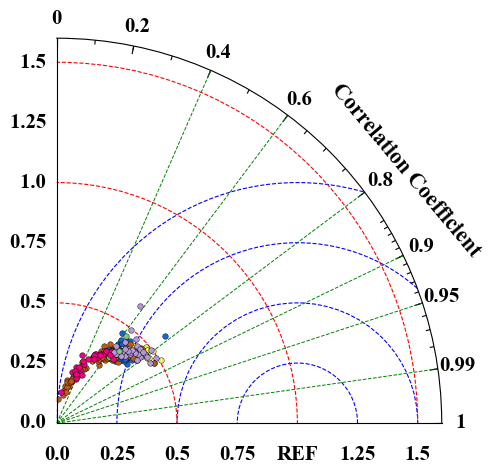

In [94]:
# 按 'CitiesID' 分组
grouped = merged_data_clean.groupby('STATION')

color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}


marker_styles = ['o', 'o','o','o','o','o','o']
marker_dict = {}


Simsun = FontProperties(fname="./font/SimSun.ttf")
Times = FontProperties(fname="./font/timesbd.ttf")
mpl.rcParams['axes.unicode_minus']=False


fig=plt.figure(figsize=(5.1,5))
axe = plt.subplot(1,1,1,projection='polar')
# axe.set_title('泰勒图',fontproperties=Simsun,fontsize=12,y=1.02)
axe.set_thetalim(thetamin=0, thetamax=90)
r_small, r_big, r_interval=0,1.6,0.25
axe.set_rlim(r_small,r_big)
rad_list=[0,0.2,0.4,0.6,0.8,0.9,0.95,0.99,1]           #需要显示数值的主要R的值
minor_rad_list=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.86,0.87,0.88,0.89,
                0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]     #需要显示刻度的次要R的值
angle_list = np.rad2deg(np.arccos(rad_list))
angle_list_rad=np.arccos(rad_list)
angle_minor_list = np.arccos(minor_rad_list)
axe.set_thetagrids(angle_list, rad_list)

for i in np.arange(r_small, r_big, r_interval):
    if i == 1:
        axe.text(0, i, s='\n' + 'REF', fontproperties=Times, fontsize=15,
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    else:
        axe.text(0, i, s='\n' + str(i), fontproperties=Times, fontsize=15,
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    axe.text(np.pi / 2, i, s=str(i) + '  ', fontproperties=Times, fontsize=15,
                  ha='right', va='center')  # text的第一个坐标是角度（弧度制），第二个是距离

axe.set_rgrids([])
labels = axe.get_xticklabels() + axe.get_yticklabels()
[label.set_fontproperties(FontProperties(fname="./font/timesbd.ttf", size=15)) for label in labels]

axe.grid(False)

angle_linewidth,angle_length,angle_minor_length=0.8,0.02,0.01
tick = [axe.get_rmax(), axe.get_rmax() * (1 - angle_length)]
tick_minor = [axe.get_rmax(), axe.get_rmax() * (1 - angle_minor_length)]
for t in angle_list_rad:
    axe.plot([t, t], tick, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离
for t in angle_minor_list:
    axe.plot([t, t], tick_minor, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离

circle = plt.Circle((1, 0), 0.25, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle1 = plt.Circle((1, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle2 = plt.Circle((1, 0), 0.75, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle3 = plt.Circle((1, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
axe.add_artist(circle)
axe.add_artist(circle1)
axe.add_artist(circle2)
axe.add_artist(circle3)

circle4 = plt.Circle((0, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle5 = plt.Circle((0, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle6 = plt.Circle((0, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)

circle7 = plt.Circle((0, 0), 0.25, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle8 = plt.Circle((0, 0), 0.75, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle9 = plt.Circle((0, 0), 1.25, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)

axe.add_artist(circle4)
axe.add_artist(circle5)
axe.add_artist(circle6)

# axe.add_artist(circle7)
# axe.add_artist(circle8)
# axe.add_artist(circle9)

# axe.set_ylabel('Normalized Standard Deviation', fontproperties=Times, labelpad=32, fontsize=16)
axe.text(np.deg2rad(25), 1.6, s='Correlation Coefficient', fontproperties=Times, fontsize=16, ha='center', va='bottom', rotation=-50)
# axe.text(np.deg2rad(50),2, s='(b)', fontproperties=Times, fontsize=14, ha='center', va='bottom')

axe.plot([0,np.arccos(0.4)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.6)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.8)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.9)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.95)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.99)],[0,1.6],lw=0.7,color='green',linestyle='--')


# # 在泰勒图中添加点
# for name, group in grouped:
#     swbgt = group['temp_y']
#     wbgt = group['TEMP']
    
#     mean_swbgt = np.mean(swbgt)
#     mean_wbgt = np.mean(wbgt)
    
#     std_swbgt = np.std(swbgt)
#     std_wbgt = np.std(wbgt)
    
#     correlation = np.corrcoef(swbgt, wbgt)[0, 1]
#     theta =  float(np.arccos(correlation))
    
#     r = float(std_swbgt / std_wbgt)
    
#     region = group['region'].iloc[0]  # Assuming all entries in a group have the same region
#     color = color_dict.get(region, '#000000')  # Use black as default color if region not found
    
#     # Determine which marker to use for this region
#     if region not in marker_dict:
#         marker_dict[region] = 0  # Initialize if this region is encountered for the first time
    
#     marker = marker_styles[marker_dict[region] % len(marker_styles)]
    
#     # Increment the marker index for this region
#     marker_dict[region] += 1
    
#     axe.plot(theta, r, marker, markersize=4, color=color,  label=f'{name}', markeredgecolor='black',markeredgewidth=0.3)
# #     axe.plot(theta, r, 'o', markersize=0.4, color='black')
    
 # Add points to the Taylor diagram for each group
for name, group in grouped:
    swbgt = group['temp_y']
    wbgt = group['TEMP']
    
    mean_swbgt = np.mean(swbgt)
    mean_wbgt = np.mean(wbgt)
    
    std_swbgt = np.std(swbgt)
    std_wbgt = np.std(wbgt)
    
    # Skip if standard deviation is zero to avoid division by zero
    if std_swbgt == 0 or std_wbgt == 0:
        continue
    
    # Calculate correlation, ensuring it's valid
    if len(swbgt) > 1 and len(wbgt) > 1:
        correlation = np.corrcoef(swbgt, wbgt)[0, 1]
        if np.isnan(correlation) or np.isinf(correlation):
            continue
    else:
        continue

    theta = float(np.arccos(correlation))
    r = float(std_swbgt / std_wbgt)
    
    region = group['region'].iloc[0]  # Assuming all entries in a group have the same region
    color = color_dict.get(region, '#000000')  # Use black as default color if region not found
    
    # Determine which marker to use for this region
    if region not in marker_dict:
        marker_dict[region] = 0  # Initialize if this region is encountered for the first time
    
    marker = marker_styles[marker_dict[region] % len(marker_styles)]
    
    # Increment the marker index for this region
    marker_dict[region] += 1
    
    axe.plot(theta, r, marker, markersize=4, color=color, label=f'{name}', markeredgecolor='black', markeredgewidth=0.3)
  
    
# print("float(np.arccos(0.99)):",float(np.arccos(0.99)))

# legend = plt.legend(loc='lower left', prop=FontProperties(fname="./font/timesbd.ttf", size=8),ncol=5,
#                     labelspacing=1, markerscale=1,bbox_to_anchor=(0, 1, 1, 0.12)) 

# legend = plt.legend(loc='center left', bbox_to_anchor=(-0.37, 0.47), prop=FontProperties(fname="./font/timesbd.ttf", size=7.5))

# leg = plt.legend(fontsize=10, bbox_to_anchor=(0, 2.17, 1, 0.12), loc='lower left', handletextpad=0.1, 
#                  ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)




legend.get_title().set_fontproperties(FontProperties(fname="./font/SimSun.ttf"))
legend.get_title().set_fontsize(fontsize=15)

plt.savefig('02 cities.png',  dpi=400, facecolor="none", transparent=True)
plt.show()

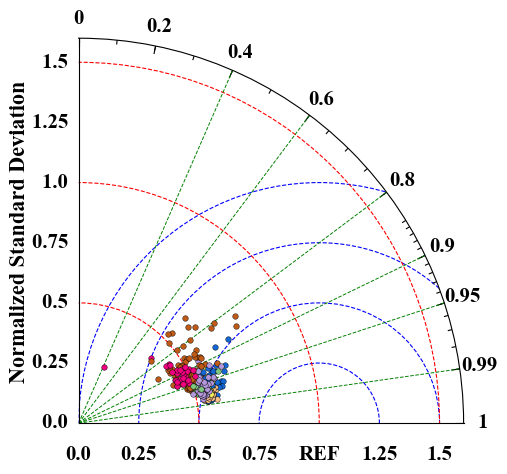

In [97]:
# 按 'CitiesID' 分组
grouped = merged_data_clean.groupby('STATION')

color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}


marker_styles = ['o', 'o','o','o','o','o','o']
marker_dict = {}


Simsun = FontProperties(fname="./font/SimSun.ttf")
Times = FontProperties(fname="./font/timesbd.ttf")
mpl.rcParams['axes.unicode_minus']=False


fig=plt.figure(figsize=(5.1,5))
axe = plt.subplot(1,1,1,projection='polar')
# axe.set_title('泰勒图',fontproperties=Simsun,fontsize=12,y=1.02)
axe.set_thetalim(thetamin=0, thetamax=90)
r_small, r_big, r_interval=0,1.6,0.25
axe.set_rlim(r_small,r_big)
rad_list=[0,0.2,0.4,0.6,0.8,0.9,0.95,0.99,1]           #需要显示数值的主要R的值
minor_rad_list=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.86,0.87,0.88,0.89,
                0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]     #需要显示刻度的次要R的值
angle_list = np.rad2deg(np.arccos(rad_list))
angle_list_rad=np.arccos(rad_list)
angle_minor_list = np.arccos(minor_rad_list)
axe.set_thetagrids(angle_list, rad_list)

for i in np.arange(r_small, r_big, r_interval):
    if i == 1:
        axe.text(0, i, s='\n' + 'REF', fontproperties=Times, fontsize=15,
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    else:
        axe.text(0, i, s='\n' + str(i), fontproperties=Times, fontsize=15,
                      ha='center', va='top')  # text的第一个坐标是角度（弧度制），第二个是距离
    axe.text(np.pi / 2, i, s=str(i) + '  ', fontproperties=Times, fontsize=15,
                  ha='right', va='center')  # text的第一个坐标是角度（弧度制），第二个是距离

axe.set_rgrids([])
labels = axe.get_xticklabels() + axe.get_yticklabels()
[label.set_fontproperties(FontProperties(fname="./font/timesbd.ttf", size=15)) for label in labels]

axe.grid(False)

angle_linewidth,angle_length,angle_minor_length=0.8,0.02,0.01
tick = [axe.get_rmax(), axe.get_rmax() * (1 - angle_length)]
tick_minor = [axe.get_rmax(), axe.get_rmax() * (1 - angle_minor_length)]
for t in angle_list_rad:
    axe.plot([t, t], tick, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离
for t in angle_minor_list:
    axe.plot([t, t], tick_minor, lw=angle_linewidth, color="k")  # 第一个坐标是角度（角度制），第二个是距离

circle = plt.Circle((1, 0), 0.25, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle1 = plt.Circle((1, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle2 = plt.Circle((1, 0), 0.75, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
circle3 = plt.Circle((1, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='blue',linestyle='--', linewidth=0.8)
axe.add_artist(circle)
axe.add_artist(circle1)
axe.add_artist(circle2)
axe.add_artist(circle3)

circle4 = plt.Circle((0, 0), 0.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle5 = plt.Circle((0, 0), 1, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle6 = plt.Circle((0, 0), 1.5, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)

circle7 = plt.Circle((0, 0), 0.25, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle8 = plt.Circle((0, 0), 0.75, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)
circle9 = plt.Circle((0, 0), 1.25, transform=axe.transData._b, facecolor=(0, 0, 0, 0), edgecolor='red',linestyle='--', linewidth=0.8)

axe.add_artist(circle4)
axe.add_artist(circle5)
axe.add_artist(circle6)

# axe.add_artist(circle7)
# axe.add_artist(circle8)
# axe.add_artist(circle9)

axe.set_ylabel('Normalized Standard Deviation', fontproperties=Times, labelpad=35, fontsize=16)
# axe.text(np.deg2rad(25), 1.6, s='Correlation Coefficient', fontproperties=Times, fontsize=16, ha='center', va='bottom', rotation=-50)
# axe.text(np.deg2rad(50),2, s='(b)', fontproperties=Times, fontsize=14, ha='center', va='bottom')

axe.plot([0,np.arccos(0.4)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.6)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.8)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.9)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.95)],[0,1.6],lw=0.7,color='green',linestyle='--')
axe.plot([0,np.arccos(0.99)],[0,1.6],lw=0.7,color='green',linestyle='--')


# # 在泰勒图中添加点
# for name, group in grouped:
#     swbgt = group['temp_y']
#     wbgt = group['TEMP']
    
#     mean_swbgt = np.mean(swbgt)
#     mean_wbgt = np.mean(wbgt)
    
#     std_swbgt = np.std(swbgt)
#     std_wbgt = np.std(wbgt)
    
#     correlation = np.corrcoef(swbgt, wbgt)[0, 1]
#     theta =  float(np.arccos(correlation))
    
#     r = float(std_swbgt / std_wbgt)
    
#     region = group['region'].iloc[0]  # Assuming all entries in a group have the same region
#     color = color_dict.get(region, '#000000')  # Use black as default color if region not found
    
#     # Determine which marker to use for this region
#     if region not in marker_dict:
#         marker_dict[region] = 0  # Initialize if this region is encountered for the first time
    
#     marker = marker_styles[marker_dict[region] % len(marker_styles)]
    
#     # Increment the marker index for this region
#     marker_dict[region] += 1
    
#     axe.plot(theta, r, marker, markersize=4, color=color,  label=f'{name}', markeredgecolor='black',markeredgewidth=0.3)
# #     axe.plot(theta, r, 'o', markersize=0.4, color='black')
    
 # Add points to the Taylor diagram for each group
for name, group in grouped:
    swbgt = group['temp_x']
    wbgt = group['TEMP']
    
    mean_swbgt = np.mean(swbgt)
    mean_wbgt = np.mean(wbgt)
    
    std_swbgt = np.std(swbgt)
    std_wbgt = np.std(wbgt)
    
    # Skip if standard deviation is zero to avoid division by zero
    if std_swbgt == 0 or std_wbgt == 0:
        continue
    
    # Calculate correlation, ensuring it's valid
    if len(swbgt) > 1 and len(wbgt) > 1:
        correlation = np.corrcoef(swbgt, wbgt)[0, 1]
        if np.isnan(correlation) or np.isinf(correlation):
            continue
    else:
        continue

    theta = float(np.arccos(correlation))
    r = float(std_swbgt / std_wbgt)
    
    region = group['region'].iloc[0]  # Assuming all entries in a group have the same region
    color = color_dict.get(region, '#000000')  # Use black as default color if region not found
    
    # Determine which marker to use for this region
    if region not in marker_dict:
        marker_dict[region] = 0  # Initialize if this region is encountered for the first time
    
    marker = marker_styles[marker_dict[region] % len(marker_styles)]
    
    # Increment the marker index for this region
    marker_dict[region] += 1
    
    axe.plot(theta, r, marker, markersize=4, color=color, label=f'{name}', markeredgecolor='black', markeredgewidth=0.3)
  
    
# print("float(np.arccos(0.99)):",float(np.arccos(0.99)))

# legend = plt.legend(loc='lower left', prop=FontProperties(fname="./font/timesbd.ttf", size=8),ncol=5,
#                     labelspacing=1, markerscale=1,bbox_to_anchor=(0, 1, 1, 0.12)) 

# legend = plt.legend(loc='center left', bbox_to_anchor=(-0.37, 0.47), prop=FontProperties(fname="./font/timesbd.ttf", size=7.5))

# leg = plt.legend(fontsize=10, bbox_to_anchor=(0, 2.17, 1, 0.12), loc='lower left', handletextpad=0.1, 
#                  ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)




legend.get_title().set_fontproperties(FontProperties(fname="./font/SimSun.ttf"))
legend.get_title().set_fontsize(fontsize=15)

plt.savefig('01 cities.png',  dpi=400, facecolor="none", transparent=True)
plt.show()

In [103]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 假设 merged_data_clean 已经加载，并具有我们感兴趣的列：['TEMP', 'temp_x', 'temp_y', 'region']
# Merge the dataframes based on the 'STATION' column to add the 'zone' attribute from station_region to merged_data_final
merged_data_with_zone = pd.merge(merged_data_final, station_region[['STATION', 'region']], on='STATION', how='left')
# print("merged_data_with_zone",merged_data_with_zone.head())

# # Now use y_observation (in Celsius) for further plotting and analysis as in the previous example
merged_data_clean = merged_data_with_zone.dropna()
# 1. TEMP 列转化为摄氏度
merged_data_clean['TEMP_C'] = (merged_data_clean['TEMP'] - 32) * 5.0 / 9.0

# 2. 按区域进行分组
grouped = merged_data_clean.groupby('region')

# 3. 初始化保存结果的列表
results = []

# 4. 计算每个区域的 Pearson, NSD, MAE, RMSE
for region, group in grouped:
    # 计算 Pearson 相关系数
    pearson_corr, _ = pearsonr(group['temp_x'], group['TEMP_C'])
    
    # 计算 Normalized Standard Deviation (NSD)
    std_temp_x = np.std(group['temp_x'])
    std_temp_c = np.std(group['TEMP_C'])
    nsd = std_temp_x / std_temp_c if std_temp_c != 0 else np.nan
    
    # 计算 MAE
    mae = np.mean(np.abs(group['temp_x'] - group['TEMP_C']))
    
    # 计算 RMSE
    rmse = np.sqrt(np.mean((group['temp_x'] - group['TEMP_C']) ** 2))
    
    # 将结果保存到列表
    results.append([region, pearson_corr, nsd, mae, rmse])

# 5. 转换为 DataFrame
results_df = pd.DataFrame(results, columns=['Region', 'Pearson', 'NSD', 'MAE (°C)', 'RMSE (°C)'])



C:\Users\HP\AppData\Local\Temp\ipykernel_29192\3051975678.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['TEMP_C'] = (merged_data_clean['TEMP'] - 32) * 5.0 / 9.0


In [105]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 假设 merged_data_clean 已经加载，并具有我们感兴趣的列：['TEMP', 'temp_x', 'temp_y', 'region']

# 1. TEMP 列转化为摄氏度
merged_data_clean['TEMP_C'] = (merged_data_clean['TEMP'] - 32) * 5.0 / 9.0

# 2. 按区域进行分组
grouped = merged_data_clean.groupby('region')

# 3. 初始化保存结果的列表
results = []

# 4. 计算每个区域的 Pearson, NSD, MAE, RMSE
for region, group in grouped:
    # 计算 Pearson 相关系数
    if len(group) > 1:  # 确保数据点数大于1，以计算相关系数
        pearson_corr, _ = pearsonr(group['temp_x'], group['TEMP_C'])
    else:
        pearson_corr = np.nan
    
    # 计算 Normalized Standard Deviation (NSD)
    std_temp_x = np.std(group['temp_x'])
    std_temp_c = np.std(group['TEMP_C'])
    nsd = std_temp_x / std_temp_c if std_temp_c != 0 else np.nan
    
    # 计算 MAE
    mae = np.mean(np.abs(group['temp_x'] - group['TEMP_C']))
    
    # 计算 RMSE
    rmse = np.sqrt(np.mean((group['temp_x'] - group['TEMP_C']) ** 2))
    
    # 将结果保存到列表
    results.append([region, pearson_corr, nsd, mae, rmse])

# 5. 转换为 DataFrame
results_df = pd.DataFrame(results, columns=['Region', 'Pearson', 'NSD', 'MAE (°C)', 'RMSE (°C)'])

# 6. 保存结果为 CSV 文件（可选）
results_df.to_csv('regional_statistics_comparison.csv', index=False)

# 7. 显示结果
print(results_df)


            Region   Pearson       NSD  MAE (°C)  RMSE (°C)
0    Central China  0.916419  0.945651  1.185690   1.676589
1       East China  0.879434  0.851000  1.449377   2.104227
2      North China  0.966494  1.006980  1.174444   1.526622
3  Northeast China  0.970952  0.966048  1.035144   1.324152
4  Northwest China  0.951914  1.139001  1.986170   2.618171
5      South China  0.866101  0.930134  1.415333   1.675885
6  Southwest China  0.924091  1.114402  2.975817   3.774188


C:\Users\HP\AppData\Local\Temp\ipykernel_29192\3646891718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['TEMP_C'] = (merged_data_clean['TEMP'] - 32) * 5.0 / 9.0


In [110]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 假设 merged_data_clean 已经加载，并具有我们感兴趣的列：['TEMP', 'temp_x', 'temp_y', 'region']

# 1. TEMP 列转化为摄氏度并保留两位小数
merged_data_clean.loc[:, 'TEMP_C'] = ((merged_data_clean['TEMP'] - 32) * 5.0 / 9.0).round(2)

# 2. 按区域进行分组
grouped = merged_data_clean.groupby('region')

# 3. 初始化保存结果的列表
results = []

# 4. 计算每个区域的 Pearson, NSD, MAE, RMSE
for region, group in grouped:
    # 计算 Pearson 相关系数
    if len(group) > 1:  # 确保数据点数大于1，以计算相关系数
        pearson_corr, _ = pearsonr(group['temp_x'], group['TEMP_C'])
    else:
        pearson_corr = np.nan
    
    # 计算 Normalized Standard Deviation (NSD)
    std_temp_x = np.std(group['temp_x'])
    std_temp_c = np.std(group['TEMP_C'])
    nsd = round(std_temp_x / std_temp_c, 2) if std_temp_c != 0 else np.nan
    
    # 计算 MAE 并保留两位小数
    mae = round(np.mean(np.abs(group['temp_x'] - group['TEMP_C'])), 2)
    
    # 计算 RMSE 并保留两位小数
    rmse = round(np.sqrt(np.mean((group['temp_x'] - group['TEMP_C']) ** 2)), 2)
    
    # 将结果保存到列表
    results.append([region, round(pearson_corr, 2), nsd, mae, rmse])

# 5. 转换为 DataFrame
results_df = pd.DataFrame(results, columns=['Region', 'Pearson', 'NSD', 'MAE (°C)', 'RMSE (°C)'])

# 6. 保存结果为 CSV 文件（可选）
results_df.to_csv('regional_statistics_comparison1.csv', index=False)

# 7. 显示结果
print(results_df)


            Region  Pearson   NSD  MAE (°C)  RMSE (°C)
0    Central China     0.92  0.95      1.19       1.68
1       East China     0.88  0.85      1.45       2.10
2      North China     0.97  1.01      1.17       1.53
3  Northeast China     0.97  0.97      1.04       1.32
4  Northwest China     0.95  1.14      1.99       2.62
5      South China     0.87  0.93      1.42       1.68
6  Southwest China     0.92  1.11      2.98       3.77


C:\Users\HP\AppData\Local\Temp\ipykernel_29192\3914017149.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean.loc[:, 'TEMP_C'] = ((merged_data_clean['TEMP'] - 32) * 5.0 / 9.0).round(2)


In [111]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 假设 merged_data_clean 已经加载，并具有我们感兴趣的列：['TEMP', 'temp_x', 'temp_y', 'region']

# 1. TEMP 列转化为摄氏度并保留两位小数
merged_data_clean.loc[:, 'TEMP_C'] = ((merged_data_clean['TEMP'] - 32) * 5.0 / 9.0).round(2)

# 2. 按区域进行分组
grouped = merged_data_clean.groupby('region')

# 3. 初始化保存结果的列表
results = []

# 4. 计算每个区域的 Pearson, NSD, MAE, RMSE
for region, group in grouped:
    # 计算 Pearson 相关系数
    if len(group) > 1:  # 确保数据点数大于1，以计算相关系数
        pearson_corr, _ = pearsonr(group['temp_y'], group['TEMP_C'])
    else:
        pearson_corr = np.nan
    
    # 计算 Normalized Standard Deviation (NSD)
    std_temp_y = np.std(group['temp_y'])
    std_temp_c = np.std(group['TEMP_C'])
    nsd = round(std_temp_y / std_temp_c, 2) if std_temp_c != 0 else np.nan
    
    # 计算 MAE 并保留两位小数
    mae = round(np.mean(np.abs(group['temp_y'] - group['TEMP_C'])), 2)
    
    # 计算 RMSE 并保留两位小数
    rmse = round(np.sqrt(np.mean((group['temp_y'] - group['TEMP_C']) ** 2)), 2)
    
    # 将结果保存到列表
    results.append([region, round(pearson_corr, 2), nsd, mae, rmse])

# 5. 转换为 DataFrame
results_df = pd.DataFrame(results, columns=['Region', 'Pearson', 'NSD', 'MAE (°C)', 'RMSE (°C)'])

# 6. 保存结果为 CSV 文件（可选）
results_df.to_csv('regional_statistics_comparison_cmip6.csv', index=False)

# 7. 显示结果
print(results_df)


            Region  Pearson   NSD  MAE (°C)  RMSE (°C)
0    Central China     0.63  0.72      2.57       3.29
1       East China     0.69  0.70      2.47       3.26
2      North China     0.78  0.80      2.72       3.45
3  Northeast China     0.78  0.84      2.44       3.11
4  Northwest China     0.87  0.95      2.89       3.64
5      South China     0.55  0.67      1.56       2.00
6  Southwest China     0.87  1.09      2.75       3.69


C:\Users\HP\AppData\Local\Temp\ipykernel_29192\2866180856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean.loc[:, 'TEMP_C'] = ((merged_data_clean['TEMP'] - 32) * 5.0 / 9.0).round(2)
